In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

#pd.set_option('display.max_rows', 100)
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
selected_data = df[['Id','FairlyActiveMinutes']]
n_rows, n_cols = df.shape
display(selected_data.head(32))

,Id,FairlyActiveMinutes
0,1503960366,13
1,1503960366,19
2,1503960366,11
3,1503960366,34
4,1503960366,10
5,1503960366,20
6,1503960366,16
7,1503960366,31
8,1503960366,12
9,1503960366,8


In [5]:
IDs = selected_data['Id'].unique()
individualAct = dict()
for Id in IDs:
    act = selected_data[selected_data['Id']==Id]
    individualAct[Id] = act['FairlyActiveMinutes'].tolist()

In [6]:
## Get the activity in the data
data_act = list(selected_data['FairlyActiveMinutes'].unique())

In [7]:
def isHit(activity, query, ths):
    
    hits = list()
    for th in ths:
        hit = False
        i = 0
        for j in range(0,len(activity)):
            #print(query[j])
            if (abs(query[i] - activity[j])<=th):
                i = i + 1
            
                if i == len(query):
                    hit = True
                    break
        
        hits.append(hit)
    return hits


In [8]:
def uniqueness(queries, domain, k, l, uniq_score, individuals, ths):
    
    print(queries[0])
    print(len(queries))
    print(len(individuals.keys()))
    
    if l > k:
        print("L > K!!!")
        return uniq_score
    
    present_queries = []
    query_matches = dict()
    
    for query in queries:
        match = dict()
        for th in ths:
            match[th] = []
            
        inData = False
        #print(query)
        for Id in individuals:
            ind_act = individuals[Id]
                
            hits = isHit(ind_act, query, ths)
                
            for i in range(0,len(ths)):
                hit = hits[i]
                
                if hit:
                    match[ths[i]].append(Id)
                    inData = True
                    #print(ths[i])
                    #print(Id)
                    #print(match)
        if inData:
            present_queries.append(query)
            query_matches[str(query)] = match
            #print(match)
    
    for i in range(0, len(ths)):
        uniquesId = []
        th = ths[i]
        #print(th)
        
        for keyquery in query_matches:
            match = query_matches[keyquery]
            
            matchTH = match[th]
            #print(keyquery)
            #print(matchTH)
            if len(list(set(matchTH))) == 1:
                #print("Unique")
                uniquesId.append(matchTH[0]) 
        
        score = (1.0*len(list(set(uniquesId))))/len(individuals.keys())
        uniq_score.append((l,th,score))
                        
    l = l + 1
    newqueries = []
    for query in present_queries:  
        for val in domain:
            newquery = query.copy()
            newquery.append(val)
            newqueries.append(newquery)
                   
    return uniqueness(newqueries, domain, k, l, uniq_score, individuals, ths)
            

In [9]:
#uniqueness up to 3 readings with th=0 and th=2
uniqueScores = list()
start_query = [[a] for a in data_act]
uniqueScores = uniqueness(start_query, data_act, 3, 1, uniqueScores, individualAct, [0, 2])

[13]
81
33
[13, 13]
6561
33
[13, 13, 13]
454248
33
[13, 13, 13, 13]
24048819
33
L > K!!!


In [10]:
uniqueScores

[(1, 0, 0.21212121212121213),
 (1, 2, 0.06060606060606061),
 (2, 0, 0.8181818181818182),
 (2, 2, 0.36363636363636365),
 (3, 0, 0.9393939393939394),
 (3, 2, 0.6666666666666666)]

## Kai's Visualization

In [23]:
my_xs = []
my_ys1 = []
my_ys2 = []
for idx, item in enumerate(uniqueScores):
    if idx%2==0:
        my_xs.append(item[0])
        my_ys1.append(item[2])
    else:
        my_ys2.append(item[2])

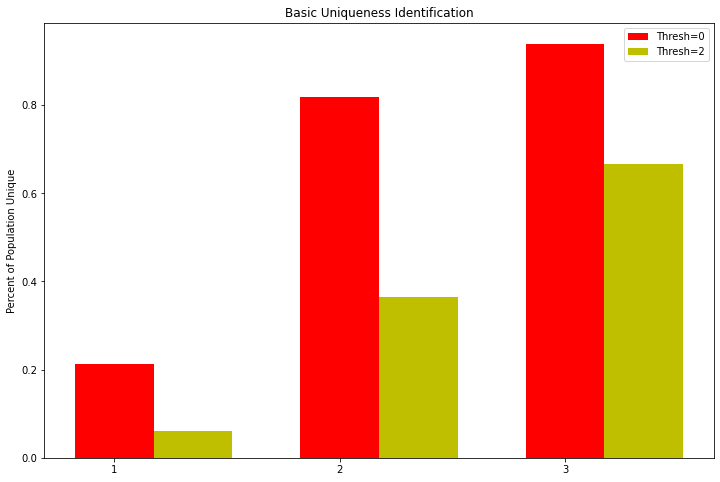

In [41]:
N = 5
width = 0.35       # the width of the bars
plt.figure(figsize=(12,8))

rects1 = plt.bar(my_xs, my_ys1, width, color='r')
rects2 = plt.bar(np.array(my_xs)+width, my_ys2, width, color='y')

# add some text for labels, title and axes ticks
plt.ylabel('Percent of Population Unique')
plt.title('Basic Uniqueness Identification')
plt.xticks(my_xs)
plt.legend((rects1[0], rects2[0]), ('Thresh=0', 'Thresh=2'))

plt.show()